In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.utils import np_utils

import tensorflow as tf
import glob

import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data 
from sklearn.preprocessing import OneHotEncoder 


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2

from sklearn import preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
f_path = "/content/drive/MyDrive/Data/p2"

In [5]:
path = []
for img in glob.glob('/content/drive/MyDrive/Data/p2/*'):
    path.append(img)

In [6]:
path[0]

'/content/drive/MyDrive/Data/p2/The Bank Job_imdb,7.3_genre,Romance.jpg'

In [6]:
def display(path):
    
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    #print(im_resized)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

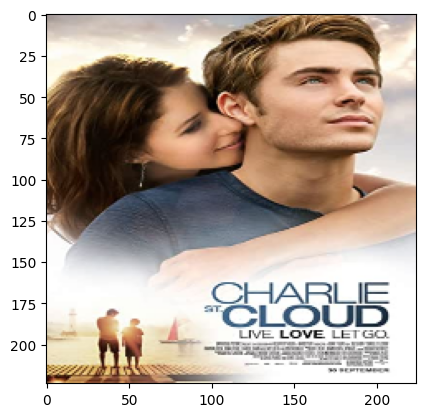

In [8]:
path = "/content/drive/MyDrive/Data/p2/Charlie St. Cloud_imdb,6.5_genre,Romance.jpg"
display(path)

In [11]:
images = []
genres = []
def readImage():
    for path in glob.glob('/content/drive/MyDrive/Data/p2/*'):
        
        im = cv2.imread(path)
        im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
        #print("appending:--",path)
        images.append(im_resized)
        
        item  = path.split("/")
        movie = item[6].split("_")
        genre = movie[2].split(".")[0].split(",")
        genres.append(genre[1])
         

In [12]:
readImage()

In [13]:
images = images[0:1000]
genres = genres[0:1000]

In [14]:
X = np.array(images).reshape(-1, 224, 224, 3)
X.shape

(1000, 224, 224, 3)

In [15]:
y = np.array(genres)
cat = np.unique(y)

In [ ]:
pre = preprocessing.LabelEncoder()
pre.fit(cat)
y = pre.transform(y)
y

In [17]:
Y = np_utils.to_categorical(y, 20)
#Y = keras.utils.to_categorical(y, 20)
print(Y[100])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)


In [19]:
batch_size = 16
epochs = 500

In [79]:
checkpoint_path = "training_1/cp-{nb_epochs :04d}.ckpt"
checkpoint_dir = f"content/drive/MyDrive/Data/modelcnn"

In [109]:
# Create a callback that saves the model's weights every 5 epochs
fp = f'drive/MyDrive/Data/modelcnn/model{epochs:08d}.h5'
cp_callback = tf.keras.callbacks.ModelCheckpoint(fp,period=100
     )

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="drive/MyDrive/Data/modelcnn/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [23]:
def createModel():
  model=Sequential()

  model.add(
      Conv2D(filters=16,
            kernel_size=2,
            padding="same",
            activation="relu",
            input_shape=(224,224,3))
  )
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Flatten())
   
  model.add(Dense(120, activation='relu'))      # The first fully connected layer.
  model.add(Dense(84, activation='relu')) 
  model.add(Dense(20,activation="softmax"))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


  model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1,
            validation_data = (X_test, y_test),
            callbacks=callbacks_list )
  
  return model

In [ ]:
# Create a basic model instance
model = createModel()

Epoch 1/500
50/50 [==============================] - ETA: 0s - loss: 114.4166 - accuracy: 0.1300
Epoch 1: val_accuracy improved from -inf to 0.20500, saving model to drive/MyDrive/Data/modelcnn/weights-improvement-01-0.20.hdf5
50/50 [==============================] - 42s 815ms/step - loss: 114.4166 - accuracy: 0.1300 - val_loss: 2.4772 - val_accuracy: 0.2050
Epoch 2/500
50/50 [==============================] - ETA: 0s - loss: 1.8959 - accuracy: 0.4225
Epoch 2: val_accuracy improved from 0.20500 to 0.24000, saving model to drive/MyDrive/Data/modelcnn/weights-improvement-02-0.24.hdf5
50/50 [==============================] - 37s 751ms/step - loss: 1.8959 - accuracy: 0.4225 - val_loss: 2.4972 - val_accuracy: 0.2400
Epoch 3/500
50/50 [==============================] - ETA: 0s - loss: 1.0130 - accuracy: 0.7100
Epoch 3: val_accuracy did not improve from 0.24000
50/50 [==============================] - 40s 801ms/step - loss: 1.0130 - accuracy: 0.7100 - val_loss: 3.1008 - val_accuracy: 0.2000
E

In [98]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 2s - loss: 9.0320 - accuracy: 0.1700 - 2s/epoch - 255ms/step
Restored model, accuracy: 17.00%


In [72]:
model.load_weights("/content/drive/MyDrive/Data/modelcnn/training_1")

# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 2s - loss: 4.0680 - accuracy: 0.1700 - 2s/epoch - 254ms/step
Restored model, accuracy: 17.00%


In [4]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Data/modelcnn/model00000010.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 28, 28, 64)     

In [5]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

NameError: ignored